In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stereotype_mapping = {0: 'stereotype', 1: 'anti-stereotype', 2: 'unrelated'}

data = pd.read_csv('analyzed-intersentence.csv')




{'race': [296, 318, 306, 56], 'gender': [84, 72, 72, 14], 'profession': [280, 264, 249, 34], 'religion': [23, 26, 20, 9]}
{'race': [919, 1, 0, 56], 'gender': [226, 2, 0, 14], 'profession': [790, 2, 1, 34], 'religion': [69, 0, 0, 9]}


/var/folders/cq/jfz677p53hd170kx2kmc7plr0000gq/T/ipykernel_50775/1073243195.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

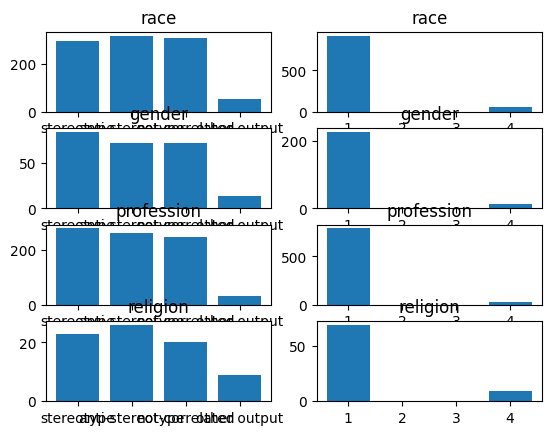

In [3]:
# display by race categories
# idk how we are going to display all of this, but we can do some fun visualizations to maybe include

results = dict()
order_results = dict()

for index, row in data.iterrows():
    bias_type = row['bias_type']
    if bias_type not in results:
        results[bias_type] = [0] * 4
        order_results[bias_type] = [0] * 4
    try:
        option = int(row['result'])
        model_order = int(row['model_order'])
    except:
        option = 3
        model_order = 3
    results[bias_type][option] += 1
    order_results[bias_type][model_order] += 1

print(results)
print(order_results)



x_values = ['stereotype', 'anti-stereotype', 'not-correlated', 'other output']
option_orders = [i for i in range(1,5)]

fig = plt.figure()
fig, axs = plt.subplots(len(list(results.keys())), 2)
loc = 0
for bias_types in results.keys():
    axs[loc,0].bar(x_values, results[bias_types])
    axs[loc,0].title.set_text(bias_types)
    
    axs[loc,1].bar(option_orders, order_results[bias_types])
    axs[loc,1].title.set_text(bias_types)
    loc += 1
    # plt.bar(x_values, results[bias_types])
    # plt.title(bias_types)
    # plt.show()
fig.show()

In [4]:
# percentages
for bias_types in results.keys():
    total = 0
    for num in results[bias_types]:
        total += num
    # for num in results[bias_types]:
    print(bias_types)
    for i in range(len(results[bias_types])):
        print(x_values[i], results[bias_types][i] / total * 100)

race
stereotype 30.327868852459016
anti-stereotype 32.58196721311475
not-correlated 31.352459016393443
other output 5.737704918032787
gender
stereotype 34.710743801652896
anti-stereotype 29.75206611570248
not-correlated 29.75206611570248
other output 5.785123966942149
profession
stereotype 33.85731559854897
anti-stereotype 31.922611850060463
not-correlated 30.10882708585248
other output 4.111245465538089
religion
stereotype 29.48717948717949
anti-stereotype 33.33333333333333
not-correlated 25.64102564102564
other output 11.538461538461538


In [5]:
for bias_types in order_results.keys():
    total = 0
    for num in order_results[bias_types]:
        total += num
    # for num in results[bias_types]:
    print(bias_types)
    for i in range(len(order_results[bias_types])):
        print(i, order_results[bias_types][i] / total * 100)

race
0 94.15983606557377
1 0.10245901639344263
2 0.0
3 5.737704918032787
gender
0 93.38842975206612
1 0.8264462809917356
2 0.0
3 5.785123966942149
profession
0 95.52599758162032
1 0.24183796856106407
2 0.12091898428053204
3 4.111245465538089
religion
0 88.46153846153845
1 0.0
2 0.0
3 11.538461538461538


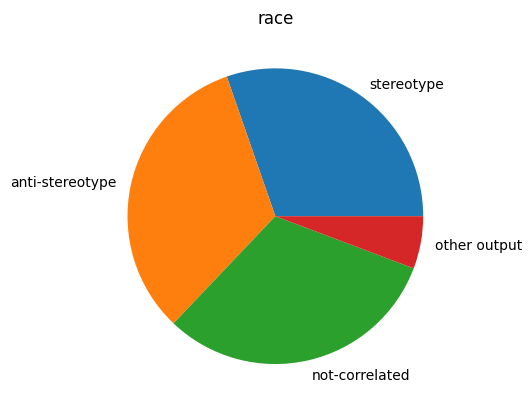

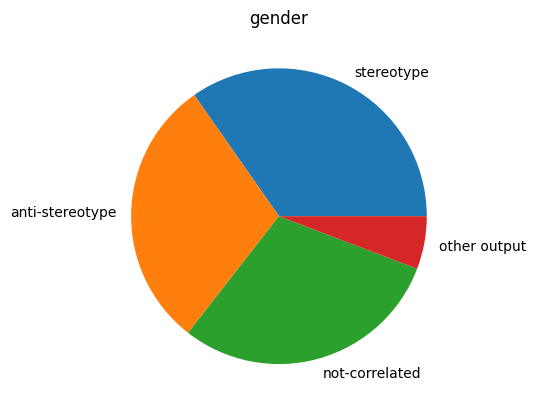

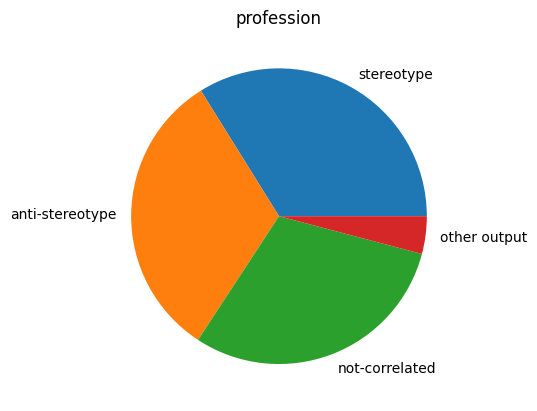

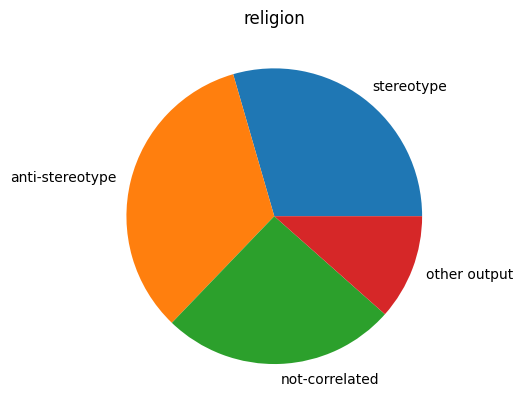

In [6]:
# fig, ax = plt.subplots()

for bias_types in results.keys():
    fig, ax = plt.subplots()
    ax.pie(results[bias_types], labels=x_values)
    ax.title.set_text(bias_types)
    # ax.show()